# Predicting Titanic Surviors

For more information regarding this dataset, visit: 
https://www.kaggle.com/c/titanic/data.

This particular script will contain an initial exploration of the data, followed by some necessary preprocessing, 
feature enineering and selection, and finally the models and results.

## Some general information regarding the Titanic
The Titanic is the world famous ship that didn't even manage to complete 1 trip. On the 10th of April 1912 it left Southhampton, England, to first pick up passengers in Cheroux, France and Queenstown, Ireland and make its way to New York. Unfortunately, in the night of the 14th/15th of April, it was steered into an iceberg. This wrecked the ship. Since there were not enough lifeboats, people were stuck on the sinking ship. As a result, the majority of the passengers drowned or froze to death in the icy waters south of Newfoundland, Canada.


##### SAD
Now that's out of the way, let's start by importing the libraries used in the exploratory part:

In [191]:
#call libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
import seaborn as sns

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (6.5, 5.0)

#Turn off pandas warning for changing variables & future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [192]:
#Import dataset and look at what information we are dealing with
titanic = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Kaggle Datasets\\Titanic\\Excel Files\\train.csv", header = 0)
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Nice!
I already see some columns that i'm pretty sure of that removing them do not cause any problems, namely PassengerID and Name. It seems extremely unlikely that someone's name or their "ID" has anything to do with surviving a boat crash. Someone's ticket ID also seems useless since everyone's ID is likely to be unique, hence has no predicting power. <br />For now I'll leave Cabin ID in the dataset since its numbers might entail information whether someones cabin was in proximity of a lifeboat 

Dropping stuff makes the data cleaner, so i'll start with removing these columns before going further with the analysis.

In [193]:
titanic = titanic.drop(columns = "PassengerId")
titanic = titanic.drop(columns = "Ticket")
titanic = titanic.drop(columns = "Name")
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Column Names
Next let's change some names of the columns. This will make future tables easier for people that have not read about what the variables exactly mean. 

In [194]:
titanic.columns = (['Survived', 'Class', 'Sex', 'Age', 
                    'n_Siblings_Spouse', 'n_Parents_Chidren', 
                    'Fare_Price', 'Cabin_ID', 'Embarked'])

### Summary statistics and NaN's
Now that's out of the way let's look at what the available columns exactly entail. 

It was observable that there are multiple missing vaues in a few columns. Let's see which columns have these missing values and 

In [195]:
print("Summary statistics of the numerical columns:")
print()
print(titanic.describe())
print()
print("Missing values per column:")
print()
print(titanic.isna().sum())

Summary statistics of the numerical columns:

         Survived       Class         Age  n_Siblings_Spouse  \
count  891.000000  891.000000  714.000000         891.000000   
mean     0.383838    2.308642   29.699118           0.523008   
std      0.486592    0.836071   14.526497           1.102743   
min      0.000000    1.000000    0.420000           0.000000   
25%      0.000000    2.000000   20.125000           0.000000   
50%      0.000000    3.000000   28.000000           0.000000   
75%      1.000000    3.000000   38.000000           1.000000   
max      1.000000    3.000000   80.000000           8.000000   

       n_Parents_Chidren  Fare_Price  
count         891.000000  891.000000  
mean            0.381594   32.204208  
std             0.806057   49.693429  
min             0.000000    0.000000  
25%             0.000000    7.910400  
50%             0.000000   14.454200  
75%             0.000000   31.000000  
max             6.000000  512.329200  

Missing values per column

### What can we make up of this?

Okay so lets list a few interesting facts that are distinghuisable from these previous statistics:

- There are a total of 891 observations
- +- 38% survived (342 passengers)
- There were 3 classes
- There were many youngsters/ adolescents on the boat half of the people were below the age of 28)
- The youngest person had an age of 0.42. This is either a very weird measurement, or there is an error and he should actually be 42 years old.
- Most people were not traveling with their siblings/spouse/parents/children.
- There is one(?) observation that had 8 siblings on board. Jesus that's a big family.
- There were fare prices of 0,-. That's one cheap ride.


- For 177 observations the age was missing. Thats +- 20% of the data. 
- 687 observations have no Cabin_ID. Maybe they did not have a cabin?
- For 2 observations it is unknown where they had embarked.

This information will come in handy in a later stage when deciding which features will be used to model with and/or when features are being engineered. Let's first make sure some of the numerical columns become categories and take a look at how the data is distributed!

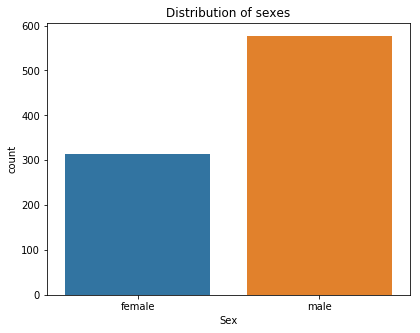

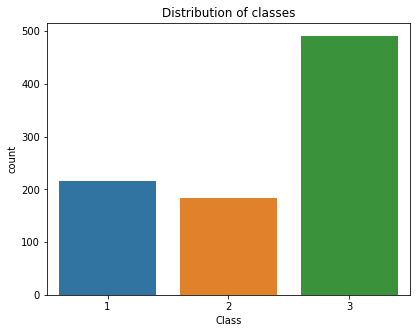

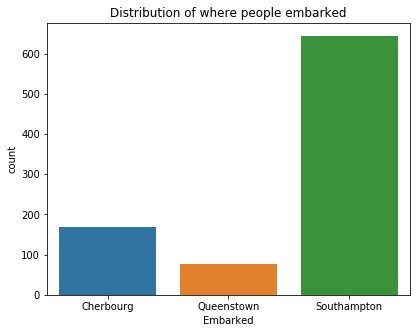

In [196]:
# Turn sex, class, survived and embarked in categorical variable
titanic["Sex"] = titanic.Sex.astype('category')
titanic["Class"] = titanic.Class.astype('category')
titanic["Survived"] = titanic.Survived.astype('category')
titanic["Embarked"] = titanic.Embarked.astype('category')

#Rename Embarked cities
titanic["Embarked"] = titanic.Embarked.cat.rename_categories({"S" :"Southampton",
                                                              "C" : "Cherbourg",
                                                              "Q" : "Queenstown"})
#Plot barplots for the independent categorical variables 
sns.countplot(titanic.Sex).set_title('Distribution of sexes')
plt.show()
sns.countplot(titanic.Class).set_title('Distribution of classes')
plt.show()
sns.countplot(titanic.Embarked).set_title('Distribution of where people embarked')
plt.show()

### About the plots

Alright so: 
- There were almost twice as many men as there were females on the ship. 
- Majority was in third class, 1st and second class have almost the same amount of passengers
- Majority of the people embarked in Southampton, followed by Queenstown and Cherbourg

Now lets see the distribution of ages and ticket prices, followed by how the different categories compare depending on their survival rate!

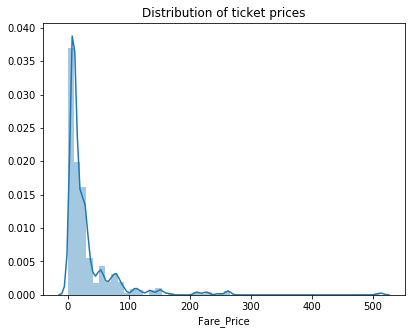

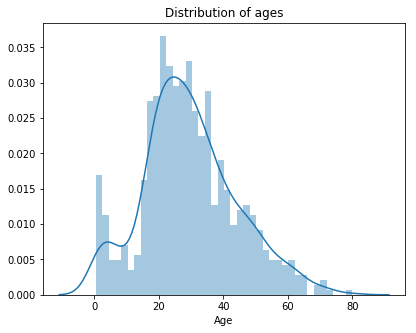

In [197]:
#Plot the distribution of the ticket price
sns.distplot(titanic.Fare_Price, bins  = 50).set_title('Distribution of ticket prices')
plt.show()

#Plot the distribution of ages
#Since there are Na's in the age distribution, we specify we only want to see the distribution of the available age data
sns.distplot(titanic.Age[-titanic.Age.isnull()], bins = 40).set_title('Distribution of ages')
plt.show()

### Prices and age

Most ticket prices seem fairly low. There are a few exeptions of very high prices. Later on i'll check the average price per class.

The age seems fairly normally distributed, although it is skewed to the right and there are many values of zero's. Are these babies or is there something weird with the data regarding the ages of the passengers? I'll have a closer look at what these children's values entail.


In [198]:
babies = titanic[titanic.Age < 2]
babies

,Survived,Class,Sex,Age,n_Siblings_Spouse,n_Parents_Chidren,Fare_Price,Cabin_ID,Embarked
78,1,2,male,0.83,0,2,29.0000,NaN,Southampton
164,0,3,male,1.00,4,1,39.6875,NaN,Southampton
172,1,3,female,1.00,1,1,11.1333,NaN,Southampton
183,1,2,male,1.00,2,1,39.0000,F4,Southampton
305,1,1,male,0.92,1,2,151.5500,C22 C26,Southampton
381,1,3,female,1.00,0,2,15.7417,NaN,Cherbourg
386,0,3,male,1.00,5,2,46.9000,NaN,Southampton
469,1,3,female,0.75,2,1,19.2583,NaN,Cherbourg
644,1,3,female,0.75,2,1,19.2583,NaN,Cherbourg
755,1,2,male,0.67,1,1,14.5000,NaN,Southampton


#### Babies
It seems that the children that were not born yet were given floats depending on how close it was to their birthday(?) Im annoyed by the fact that this causes all the ages to be catagorized as 'floats' so i'm gonna change these values into 0's (since that is their actual age.

In [199]:
#specify the ages that should be turned into 0 and change types to integer
titanic.Age[titanic.Age < 1] = 0
titanic.Age[-titanic.Age.isnull()] = titanic.Age[-titanic.Age.isnull()].astype('int')

#### The rich kids
Now lets have a closer look at the more wealthy people, the ones that purchased a more expensive boat ticket, and see what kind of people these were.

In [200]:
#show observations where fare price > 100,-
titanic[titanic.Fare_Price > 100]

,Survived,Class,Sex,Age,n_Siblings_Spouse,n_Parents_Chidren,Fare_Price,Cabin_ID,Embarked
27,0,1,male,19.0,3,2,263.0000,C23 C25 C27,Southampton
31,1,1,female,NaN,1,0,146.5208,B78,Cherbourg
88,1,1,female,23.0,3,2,263.0000,C23 C25 C27,Southampton
118,0,1,male,24.0,0,1,247.5208,B58 B60,Cherbourg
195,1,1,female,58.0,0,0,146.5208,B80,Cherbourg
215,1,1,female,31.0,1,0,113.2750,D36,Cherbourg
258,1,1,female,35.0,0,0,512.3292,NaN,Cherbourg
268,1,1,female,58.0,0,1,153.4625,C125,Southampton
269,1,1,female,35.0,0,0,135.6333,C99,Southampton
297,0,1,female,2.0,1,2,151.5500,C22 C26,Southampton


#### Wealthy French women
When looking at the table presented above, interestingly enough it appears that there are many women that have bought the more expensive tickets, even though the passengerlist is predominately filled with men (65%). This means that the lower tickts were relatively sold even more to men than to women. Perhaps poor men were more attracted in the 1910's to migrate and find their luck in the USA than the women in their social class. <br />Also interesting to note is that many of the observations seem to have embarked in Cherbourg, whereas in general most people embarked in Southhampton (only 19% of the total passengers embarked in Cherbourg). Must be a fancy place. 

I'll estimate the specific percentages to see whether these observations are actually true.

In [201]:
#Create the dataframe for ticket prices that were above 100,-
the_wealthy = titanic[titanic.Fare_Price > 100]

#calculate the percentage that was either female and the percentage that embarked in Cherbourg within this dataframe. 
print("Of the people that had a ticket price of more than 100,",
      (len(the_wealthy[the_wealthy.Sex == 'female'])) / (len(the_wealthy))*100, 
      "% was female.")
print()
print("Of the people that had a ticket price of more than 100,",
      (len(the_wealthy[the_wealthy.Embarked == 'Cherbourg'])) / (len(the_wealthy))*100,
     "% embarked in Cherbourg.")

Of the people that had a ticket price of more than 100, 64.15094339622641 % was female.

Of the people that had a ticket price of more than 100, 54.71698113207547 % embarked in Cherbourg.


#### Okay 
So that quick hypothesis appeared to be correct. Distributions seem to shift depending on specific customer segments. 
#### The missing ages
The 177 missing observations regarding the age of passengers is currently still unsolved. I think i will impute these values, but let's first see whether there is a specific pattern observable for the customers where the age is missing. 

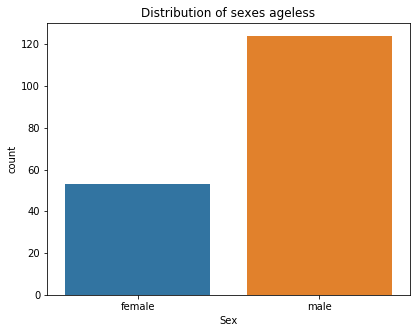

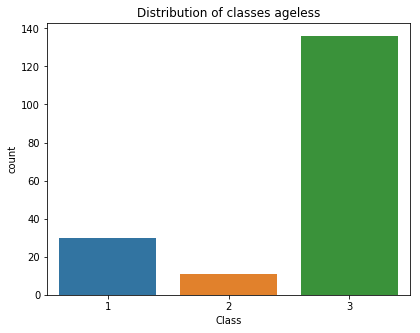

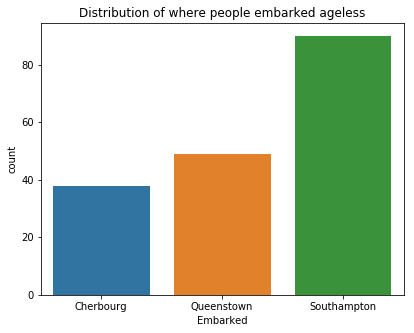

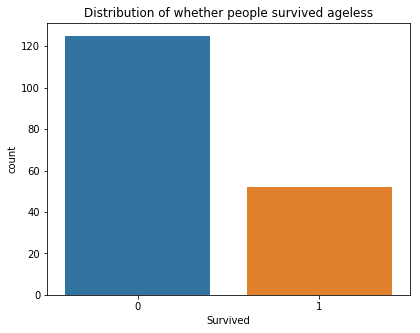

In [202]:
NaN_ages = titanic[-(titanic.Age > -2)]

#Plot barplots for the independent categorical variables 
sns.countplot(NaN_ages.Sex).set_title('Distribution of sexes ageless')
plt.show()
sns.countplot(NaN_ages.Class).set_title('Distribution of classes ageless')
plt.show()
sns.countplot(NaN_ages.Embarked).set_title('Distribution of where people embarked ageless')
plt.show()
sns.countplot(NaN_ages.Survived).set_title('Distribution of whether people survived ageless')
plt.show()

#### Regarding the Ageless...
Allright so it appears that the people where no age was noted have a similiar distribution of males and females when compared to the full dataset. They overwhelmingly were in third class, and by the looks of it, almost everyone that embarked in Queenstown misses lacks their respective age. The amount of survivors amongst these ageless people appears to be similarly distributed when compared with the full dataset.

let's extend this analysis to see whether spouse/children might have caused the data to go missing....

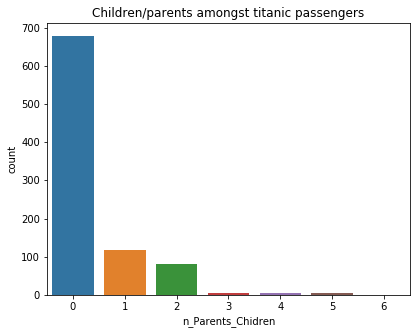

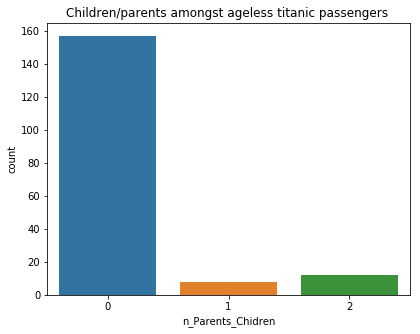

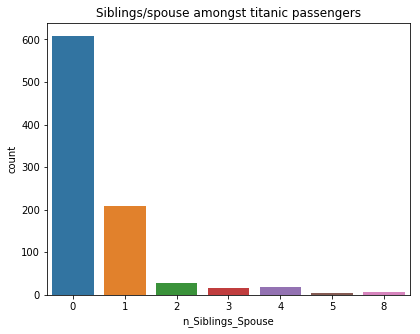

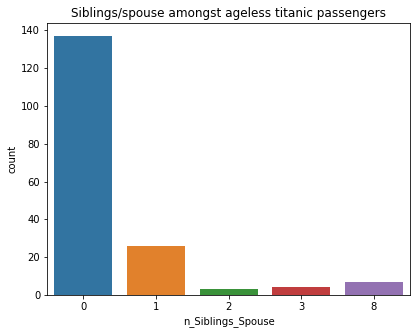

In [203]:
#full dataset children/parent distribution
sns.countplot(titanic.n_Parents_Chidren).set_title('Children/parents amongst titanic passengers')
plt.show()
#ageless children/parent distribution
sns.countplot(NaN_ages.n_Parents_Chidren).set_title('Children/parents amongst ageless titanic passengers ')
plt.show()

#full dataset sibling/spouse distribution
sns.countplot(titanic.n_Siblings_Spouse).set_title('Siblings/spouse amongst titanic passengers')
plt.show()
#ageless sibling/spouse distribution
sns.countplot(NaN_ages.n_Siblings_Spouse).set_title('Siblings/spouse amongst ageless titanic passengers')
plt.show()

#### No major differences
People seem to be slightly more on themselves compared to the full dataset. The difference does not appear to be striking though.

### Dead or alive???
Let's have a closer look at the thing we are interested in the most when researching this dataset: What did the people that survived the disaster have relatively a lot in common. Did they all embark in the same city? Were they in the same age group? Did the men leave the women to die while rowing out of the danger zone quickly? The following few plots and statistics should provide a more in-depth 

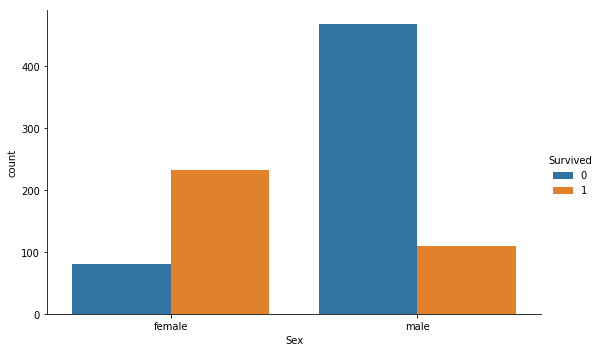

In [204]:
#distinguish survival by sex
sns.catplot('Sex', data = titanic, hue = 'Survived', kind='count', aspect=1.5)
plt.show()

#### The ladies live
Well this plot already shows that sex was of a huge huge influence when it comes to surviving. About 1/6th of the men appear to have survived compared to 3/4th of the women. Well done ladies!

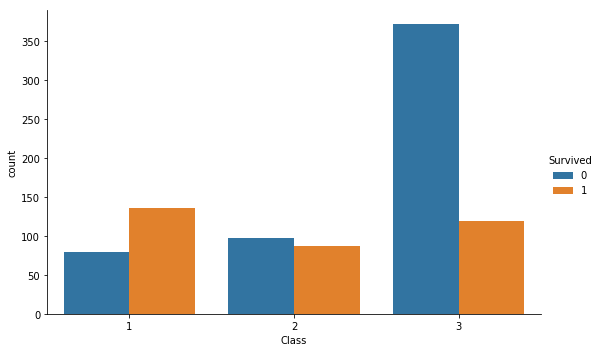

In [205]:
#distinguish survival by class
sns.catplot('Class', data = titanic, hue = 'Survived', kind='count', aspect=1.5)
plt.show()

#### Show some class
Which class your ticket the people were residing in was also of major influence on whether they survived. This ofcourse can be related to sex as well, since there were a lot more men in third class than female. Anyhow, Third class citizens died by the numbers, where the mahjority of the first classers survived.  

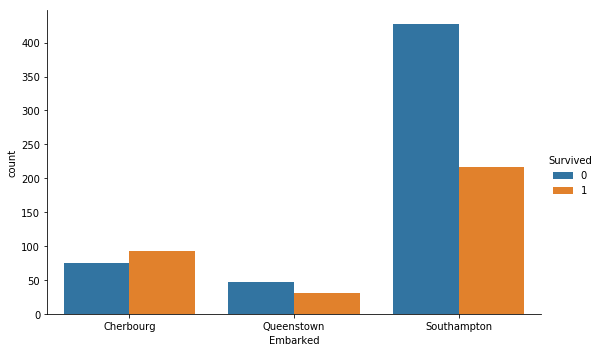

In [206]:
#distinguish survival by where people were embarked
sns.catplot('Embarked', data = titanic, hue = 'Survived', kind='count', aspect=1.5)
plt.show()

#### Sacre Bleu!
There are some differences distinguishable between where people embarked and whether they surived or not. The French had a bigger chance of survival than the English had. Again, this seems more than a correlation than as a causation, considering that the French were outnumbering the others in the first-class suites. 

In [207]:
#make a categorical variable for the ages
titanic.loc[(titanic.Age < 15), "AgeCat"] = "Kids"
titanic.loc[(titanic.Age >= 15) & (titanic.Age <= 30), "AgeCat"] = "Adolescents"
titanic.loc[(titanic.Age >= 31) & (titanic.Age <= 60), "AgeCat"] = "Adults"
titanic.loc[(titanic.Age >= 61), "AgeCat"] = "Elderly"

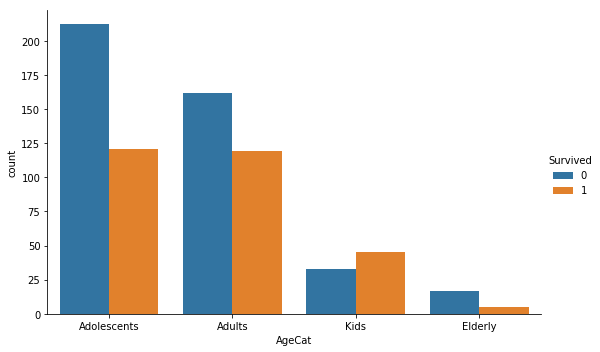

In [208]:
#distinguish survival by agecategories

sns.catplot('AgeCat', data = titanic, hue = 'Survived', kind='count', aspect=1.5)
plt.show()

#### Forever Young
Alright so I took the age categories very broad but it was mainly to get some idea of what's going on. These categories therefore probably give an incomplete image. Anyhow, the kids were the luckiest ones. More Survived than died, which is nice. The elderly seem to have experienced the worst survival ratio. about 1/4th survived. Ice Cold water and the ability to run towards the lifeboats might have played a role here. Adolescents and adults both were not very lucky, but someone has to take the blow amiright?

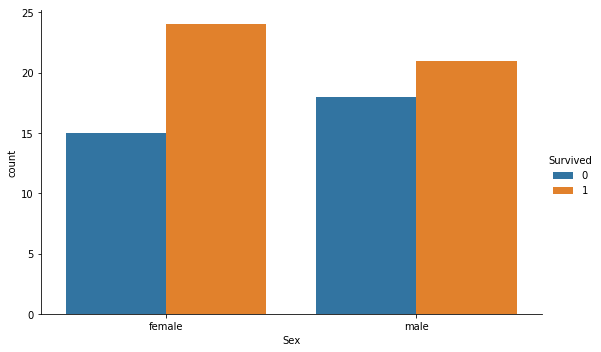

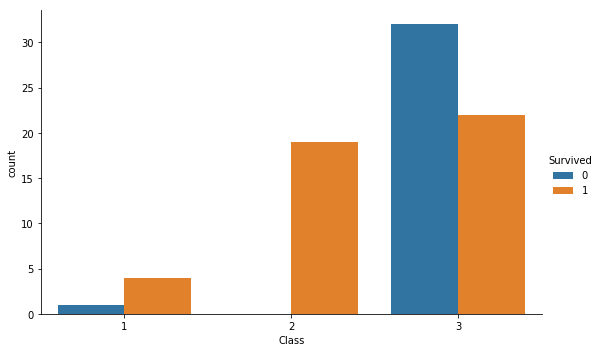

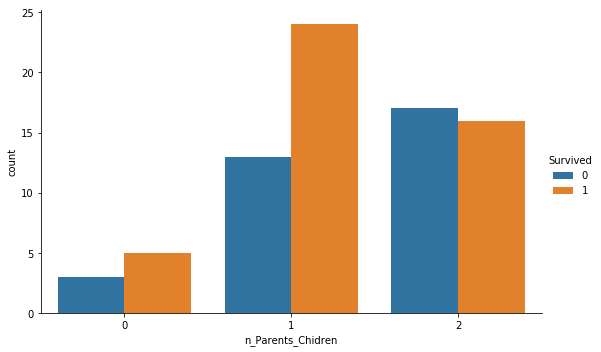

In [209]:
#create dataframe for only the kid category
save_the_kids = titanic[titanic.AgeCat == "Kids"]
#plot the kids' sex and survival
sns.catplot('Sex', data = save_the_kids, hue = 'Survived', kind='count', aspect=1.5)
plt.show()
#plot the kids' ticket class and survival
sns.catplot('Class', data = save_the_kids, hue = 'Survived', kind='count', aspect=1.5)
plt.show()
#plot the how many parents were with the children and their survival
sns.catplot('n_Parents_Chidren', data = save_the_kids, hue = 'Survived', kind='count', aspect=1.5)
plt.show()


#### All about the kids
When taking a look at the passengers up untill the age of 14, we see that even for the young ones wthe women were more lucky than the man. Also, sad to see is that class mattered even for the children. Kids in third class had lower survivability rate than in dhe higher classes (only 1 didn't survive in all of class 1 and 2)

Also remarkable is that children that traveled with 2 parents had a much lower survival rate than children that traveled with 1 parent or no parents. Could be a coincidence, or there might be an interesting cause to this.

### Lets make a quick model!

Another way that can help to learn more about the data is to create a quick first model without any specific feature engineering. Let's also run a random forest to see what variables currently have to most predictive power. For simplicty lets start by dropping rows where the age is unknown and getting rid of cabinID.

In [213]:
#convert all categories into numerical variables so they can be proberly used to model with
titanic.Sex = pd.CategoricalIndex(titanic.Sex)
titanic.Class = pd.CategoricalIndex(titanic.Class)
titanic.Embarked = pd.CategoricalIndex(titanic.Embarked)


titanic['Sex'] = titanic.Sex.cat.codes
titanic['Class'] = titanic.Class.cat.codes
titanic['Embarked'] = titanic.Embarked.cat.codes

titanic = titanic.drop(["Cabin_ID", "AgeCat"], axis = 1)

In [215]:
titanic2 = titanic.dropna()

In [216]:
#Split the data in a train and testset
titanic_dep = titanic2.Survived
titanic_indep = titanic2.drop(['Survived'], axis=1)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_indep, titanic_dep, test_size=0.3)

#Tree packages for checking the feature importance
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 

# Build a forest and compute the feature importances
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)


0.7813953488372093

In [217]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print(feature_importances)

                   importance
Fare_Price           0.285133
Age                  0.269577
Sex                  0.249057
Class                0.068347
n_Siblings_Spouse    0.056361
n_Parents_Chidren    0.044624
Embarked             0.026900
